In [259]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Independent Sampler

In [260]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import independent

In [261]:
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1=[14], final_kstar2=[14], binfrac_model=1.0, primary_model='kroupa93', ecc_model='sana12', porb_model='sana12', qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=10000)

Text(0, 0.5, '$m_2$')

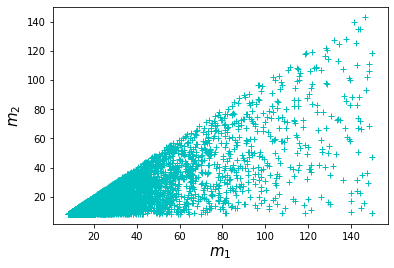

In [262]:
plt.plot(InitialBinaries.mass_1,InitialBinaries.mass_2,"c+")
plt.xlabel(r"$m_1$",size=15)
plt.ylabel(r"$m_2$",size=15)

In [263]:
plt.hist(np.log10(InitialBinaries.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color="c", label='$m_1$')
plt.hist(np.log10(InitialBinaries.mass_2), bins = 20, histtype='step', density=True,
         lw=3, color="r", label='$m_2$')
plt.xlabel(r'Log$_{10}$(M/M$_{\odot}$)', size=18)
plt.ylabel('normalized counts', size=18)
plt.legend()
plt.legend(prop={'size' : 18})
plt.show()

## Evolving the population

In [264]:
from cosmic.evolve import Evolve

In [265]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

In [266]:
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
      kstar_1  kstar_2      mass_1     mass_2      porb       ecc  \
125       1.0      1.0  106.878555  94.105888  1.929077  0.027557   
186       1.0      1.0   56.893494  52.228433  1.657748  0.481630   
301       1.0      1.0   59.198884  27.505459  1.528034  0.230572   
302       1.0      1.0   36.349252  27.689575  1.437899  0.027532   
568       1.0      1.0  101.735546  40.705746  1.470899  0.046559   
...       ...      ...         ...        ...       ...       ...   
9466      1.0      1.0   67.156216  54.342154  1.546677  0.136587   
9600      1.0      1.0   73.851153  46.735298  1.561587  0.397015   
9609      1.0      1.0   89.041227  48.782927  1.853648  0.616421   
9628      1.0      1.0  140.035403  22.780894  2.286731  0.002549   
9756      1.0      1.0   44.872821  26.413361  1.442019  0.069511   

In [267]:
bcm

tphys  kstar_1     mass0_1      mass_1         lum_1      rad_1  \
0          0.0      1.0   10.724486   10.724486  7.104561e+03   4.341959   
0      13700.0     13.0   18.093040    2.228425  1.825447e-10   0.000014   
1          0.0      1.0  136.950339  136.950339  2.177811e+06  23.348325   
1      13700.0     14.0   13.288968   10.831862  1.000000e-10   0.000046   
2          0.0      1.0   51.257129   51.257129  3.892006e+05  11.713395   
...        ...      ...         ...         ...           ...        ...   
10032  13700.0     13.0    7.377626    2.753538  2.102822e-10   0.000014   
10033      0.0      1.0   13.990199   13.990199  1.617222e+04   5.098684   
10033  13700.0     13.0   13.441254    1.459625  1.375890e-10   0.000014   
10034      0.0      1.0   14.529671   14.529671  1.810123e+04   5.217865   
10034  13700.0     13.0    7.060742    2.539708  1.991951e-10   0.000014   

             teff_1    massc_1    radc_1        menv_1  ...          porb  \
0      25545.304691   0.000000  0.000000  1.000000e-10  ...      2.258163   
0       5695.710252   2.228425  0.000014  1.000000e-10  ...      0.000000   
1      46094.254715   0.000000  0.000000  1.000000e-10  ...      5.788018   
1       2705.422702  10.831862  0.000046  1.000000e-10  ...      0.000000   
2      42312.782704   0.000000  0.000000  1.000000e-10  ...    726.182938   
...             ...        ...       ...           ...  ...           ...   
10032   5900.736309   2.753538  0.000014  1.000000e-10  ...      0.000000   
10033  28955.629078   0.000000  0.000000  1.000000e-10  ...  15503.719428   
10033   5307.029642   1.459625  0.000014  1.000000e-10  ...     -1.000000   
10034  29440.841665   0.000000  0.000000  1.000000e-10  ...      1.538332   
10034   5821.370918   2.539708  0.000014  1.000000e-10  ...      0.000000   

               sep       ecc           B_1           B_2  SN_1  SN_2  \
0        19.381849  0.778276  0.000000e+00  0.000000e+00   0.0   0.0   
0         0.000000 -1.000000  3.083563e+11  0.000000e+00   1.0   0.0   
1        79.815280  0.348464  0.000000e+00  0.000000e+00   0.0   0.0   
1         0.000000 -1.000000  0.000000e+00  0.000000e+00   1.0   0.0   
2      1345.339034  0.896416  0.000000e+00  0.000000e+00   0.0   0.0   
...            ...       ...           ...           ...   ...   ...   
10032     0.000000 -1.000000  5.023084e+09  0.000000e+00   1.0   0.0   
10033  7361.032204  0.299738  0.000000e+00  0.000000e+00   0.0   0.0   
10033    -1.000000 -1.000000  3.291210e+10  1.523713e+10   1.0   1.0   
10034    16.253421  0.394834  0.000000e+00  0.000000e+00   0.0   0.0   
10034     0.000000 -1.000000  4.315177e+11  0.000000e+00   1.0   0.0   

       bin_state  merger_type  bin_num  
0              0         -001        0  
0              1         0101        0  
1              0         -001        1  
1              1         0101        1  
2              0         -001        2  
...          ...          ...      ...  
10032          1         0101    10032  
10033          0         -001    10033  
10033          2         -001    10033  
10034          0         -001    10034  
10034          1         0101    10034  

[20070 rows x 39 columns]

In [273]:
bh_index_1 = np.array(bcm[bcm.kstar_1==14.0].index)
bh_final_m1 = np.array(bcm[bcm.kstar_1==14.0].mass_1)

bh_index_2 = np.array(bcm[bcm.kstar_2==14.0].index)
bh_final_m2 = np.array(bcm[bcm.kstar_2==14.0].mass_2)

In [274]:
bh_final_m2

array([3.05623834, 4.41603969, 3.2520187 , ..., 3.08351287, 6.0335838 ,
       3.12074685])

In [275]:
bh_ini_m1 = []
bh_ini_m2 = []

In [276]:
for indx in bh_index_1:
    bh_ini_m1.append(np.array(bcm[bcm.index==indx].mass_1)[0])
    
for indx in bh_index_2:
    bh_ini_m2.append(np.array(bcm[bcm.index==indx].mass_2)[0])

In [326]:
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,label="m1")
#plt.scatter(np.log10(bh_ini_m2),np.log10(bh_final_m2),s=0.4,label="m2")
plt.xlabel(r'Log$_{10}$(M$_{i}$/M$_{\odot}$)', size=15)
plt.ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=15)
#plt.legend()
plt.title("Mass relation for BHs in the population")
plt.xlim(1.5,1.6)
plt.ylim(0.46,0.6)
plt.show()
#plt.scatter(np.log10(bh_ini_m2+bh_ini_m1),np.log10(bh_final_m2+bh_ini_m2),s=0.4)

In [331]:
m_bh = pd.DataFrame({'m1_ini': bh_ini_m1, 'm1_final': bh_final_m1,'m2_ini': bh_ini_m1, 'm2_final': bh_final_m1})

In [332]:
m1_bh_sort1  = m1_bh[np.log10(m1_bh["m1_ini"])>1.5]

In [333]:
m1_bh_sort2 = m1_bh_sort1[np.log10(m1_bh_sort1["m1_ini"])<1.6]

In [334]:
m1_bh_sort3 = m1_bh_sort2[np.log10(m1_bh_sort2["m1_final"])>0.46]

In [ ]:
m1_bh_sort4 = m1_bh_sort2[np.log10(m1_bh_sort3["m1_final"])<0.46]

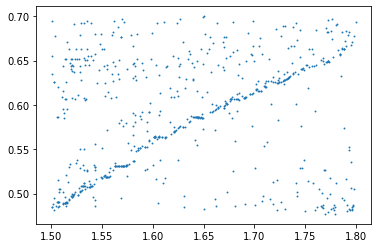

In [303]:
plt.scatter(np.log10(m1_bh_sort3["m1_ini"]),np.log10(m1_bh_sort3["m1_final"]),s=0.8)

In [306]:
m,b = np.polyfit(np.log10(m1_bh_sort3["m1_ini"]),np.log10(m1_bh_sort3["m1_final"]),1)

In [312]:
plt.plot(np.log10(m1_bh_sort3["m1_ini"]),m*np.log10(m1_bh_sort3["m1_ini"])+b,"r")
plt.scatter(np.log10(m1_bh_sort3["m1_ini"]),np.log10(m1_bh_sort3["m1_final"]),s=0.8)